In [1]:
# 데이터분석

In [2]:
import pandas as pd

In [7]:
df = pd.read_csv('./backup.csv')
df_U4 = pd.read_csv("./input_t.csv")
df_result = pd.read_csv("./result_cosU.csv")

In [5]:
df.head()

,title_kor,opening_date,genre,director,actors,synopsis,imdb_rating,just_rating,runtime,posterLink,Mark
0,증기선 윌리,1928.0,애니메이션,UbIwerks,WaltDisney,첫 미키 마우스 애니메이션 개봉작이자 동시 녹음을 활용한 최초의 애니메이션. 배 위...,80%,80%,8min,https://images.justwatch.com/poster/18697230/s592,D
1,Flowers and Trees,1932.0,애니메이션,BurtGillett,"ClarenceNash,EstherCampbell,MarionDarlington,P...",A jealous stump threatens two trees that are i...,73%,73%,8min,https://images.justwatch.com/poster/11993645/s592,D
2,아기 돼지 삼형제,1933.0,"애니메이션,코미디,가족,음악",BurtGillett,"BillyBletcher,PintoColvig,DorothyCompton,MaryM...","아카데미 상을 받은 이 단편에서, 아기 돼지 삼 형제는 각자의 집을 짓는다. 하나는...",74%,74%,8min,https://images.justwatch.com/poster/19274730/s592,D
3,The Tortoise and the Hare,1935.0,"판타지,다큐멘터리",WilfredJackson,"EddieHolden,NedNorton,PintoColvig,MarcelliteGa...",The Tortoise and the Hare is an animated short...,73%,73%,9min,https://images.justwatch.com/poster/138275030/...,D
4,현명한 암탉,1934.0,애니메이션,WilfredJackson,"FlorenceGill,ClarenceNash,PurvPullen",고전 단편 애니메이션 '현명한 암탉'에 도날드 덕이 데뷔한다. 옥수수를 심고 있는 ...,70%,70%,8min,https://images.justwatch.com/poster/241272125/...,D


In [6]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

t = TfidfVectorizer()

In [16]:
synop = list(df_U4['input_t'])
type(synop)

list

In [23]:
df_U4.info()                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9763 entries, 0 to 9762
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9763 non-null   int64 
 1   title       9763 non-null   object
 2   synopsis    9763 non-null   object
 3   input_t     9763 non-null   object
dtypes: int64(1), object(3)
memory usage: 305.2+ KB


In [21]:
t_synop = [r.split() for r in synop]
t_synop[:4]

[['증기선',
  '윌리',
  '애니메이션',
  'UbIwerks',
  'WaltDisney',
  '첫',
  '미키',
  '마우스',
  '애니메이션',
  '개봉작이자',
  '동시',
  '녹음을',
  '활용한',
  '최초의',
  '애니메이션.',
  '배',
  '위의',
  '장난꾸러기',
  '선원',
  '미키는',
  '미니를',
  '기쁘게',
  '하기',
  '위해',
  '동물들을',
  '악기',
  '삼아',
  '“짚',
  '속의',
  '칠면조”를',
  '연주한다.',
  '포악한',
  '피트',
  '선장의',
  '화를',
  '돋운',
  '미키는',
  '조리실에서',
  '감자',
  '깎는',
  '일을',
  '하게',
  '된다.'],
 ['Flowers',
  'and',
  'Trees',
  '애니메이션',
  'BurtGillett',
  'ClarenceNash,EstherCampbell,MarionDarlington,PintoColvig,WaltDisney',
  'A',
  'jealous',
  'stump',
  'threatens',
  'two',
  'trees',
  'that',
  'are',
  'in',
  'love',
  'by',
  'starting',
  'a',
  'forest',
  'fire.',
  'When',
  'the',
  'rain',
  'comes',
  'and',
  'puts',
  'out',
  'the',
  'fire',
  'the',
  'forest',
  'revives',
  'and',
  'celebrates',
  'the',
  'wedding.'],
 ['아기',
  '돼지',
  '삼형제',
  '애니메이션,코미디,가족,음악',
  'BurtGillett',
  'BillyBletcher,PintoColvig,DorothyCompton,MaryModer',
  '아카데미',
  '상을',
  '받은',


In [19]:
len_by_t = [len(t) for t in t_synop]
len_by_t[:4]

[43, 37, 50, 61]

In [22]:
t_synop[0]

['증기선',
 '윌리',
 '애니메이션',
 'UbIwerks',
 'WaltDisney',
 '첫',
 '미키',
 '마우스',
 '애니메이션',
 '개봉작이자',
 '동시',
 '녹음을',
 '활용한',
 '최초의',
 '애니메이션.',
 '배',
 '위의',
 '장난꾸러기',
 '선원',
 '미키는',
 '미니를',
 '기쁘게',
 '하기',
 '위해',
 '동물들을',
 '악기',
 '삼아',
 '“짚',
 '속의',
 '칠면조”를',
 '연주한다.',
 '포악한',
 '피트',
 '선장의',
 '화를',
 '돋운',
 '미키는',
 '조리실에서',
 '감자',
 '깎는',
 '일을',
 '하게',
 '된다.']

In [25]:
len_by_um = [len(s.replace(' ','')) for s in synop]
len_by_um[:4]

[137, 236, 213, 238]

<ipython-input-33-666077623eb8>:7: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'count_synop_text')

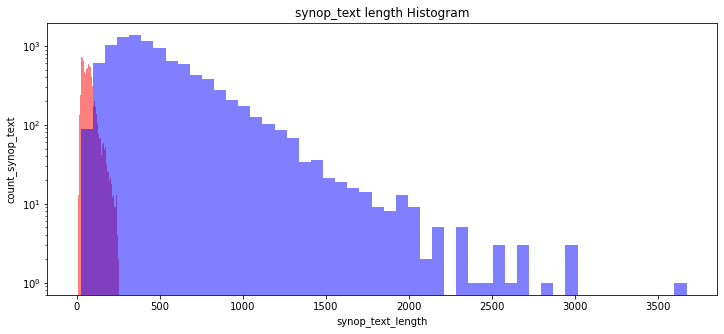

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.hist(len_by_t, bins=50, alpha=0.5, color='r', label='word')
plt.hist(len_by_um, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

plt.title('synop_text length Histogram')
plt.xlabel('synop_text_length')
plt.ylabel('count_synop_text')

# plt.show()


In [35]:
#문장최소길이
import numpy as np

In [49]:
np.max(len_by_t) # 250개
np.min(len_by_t) # 5개
np.mean(len_by_t).round(1) # 69.3개
np.median(len_by_t) #63개
np.percentile(len_by_t, 25) # 39.0개
np.percentile(len_by_t, 75) # 86.0개

86.0

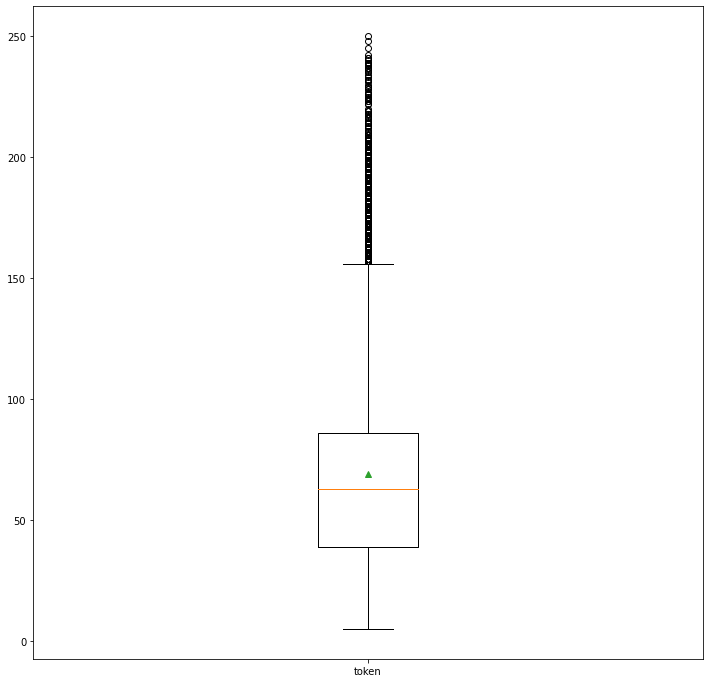

In [55]:
plt.figure(figsize=(12,12))
plt.boxplot([len_by_t], labels=['token'], showmeans=True)
plt.show()

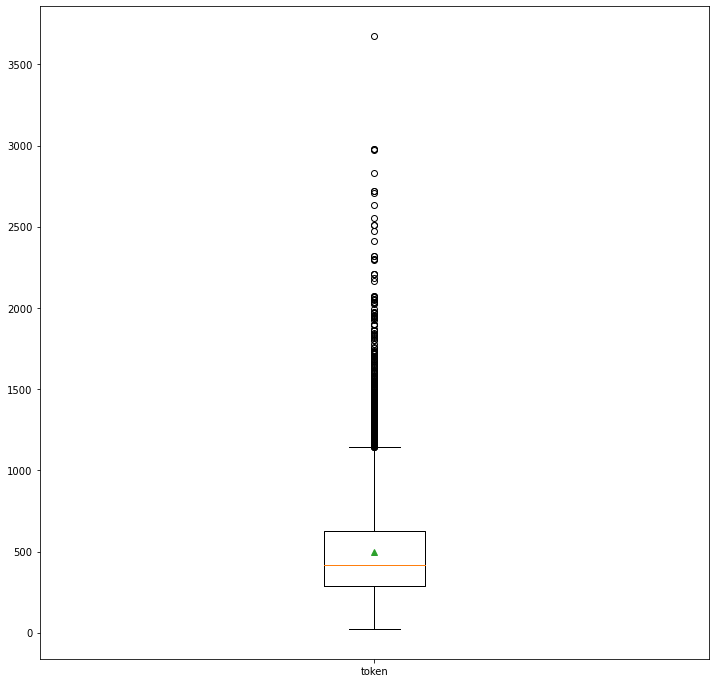

In [56]:
plt.figure(figsize=(12,12))
plt.boxplot([len_by_um], labels=['token'], showmeans=True)
plt.show()

In [2]:
# !pip install wordcloud

In [3]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [4]:
import seaborn

In [5]:
sdfasdfasdfsadfksdlkfjksldjflkajkdlfjqowiejflaskjfdklsjdkfjalskjdf


asldkjflksadjflkajsdkfjqoiejrlkasjdfkljsa9f9oiqjef

NameError: name 'sdfasdfasdfsadfksdlkfjksldjflkajkdlfjqowiejflaskjfdklsjdkfjalskjdf' is not defined

In [ ]:
asdlkf